Author: Irsyad Adam

Date: Jan 28 2022

## HRpEF/HRrEF Network

For Graph Analysis using Neo4j Graph Algorithms, we need to create a cypher projection and set the graph in memory:

@cypher:

    CALL gds.graph.create(
    'KG',
        ["Category", "Drug", "PMID", "Protein"],
        {
            HAS_RELATED_DRUG: {orientation: 'UNDIRECTED'},
            HAS_UNIREF_ID: {orientation: 'UNDIRECTED'},
            IS_IN_CATEGORY: {orientation: 'UNDIRECTED'},
            PMID_TARGET: {orientation: 'UNDIRECTED'}
        }
    )



In [87]:
from neo4j import GraphDatabase 
import pandas as pd

from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
class degree():
    """Class to run LinkPred"""
    def __init__(self) -> None:
        self.driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", "heart"))

    def close(self) -> None:
        self.driver.close()

    @classmethod
    def algo(cls, tx) -> any:
        """
        @param cls is the class
        @param tx is the transaction
        @return result.data() is the data of algo
        """
        query = ("""
        CALL gds.degree.stream("KG")
        YIELD nodeId, score
        RETURN LABELS(gds.util.asNode(nodeId)) AS Type, nodeId as ID, score AS Degree
        ORDER BY Degree DESCENDING, ID DESC, Type DESC
        """)
        result = tx.run(query)
        return result.data()


    def run_algo(self) -> any:
        """
        @param self
        @return result is the dataframe from the degree centrality
        """
        result = self.driver.session().write_transaction(self.algo)
        result = pd.DataFrame(result)
        return result

In [72]:
hello = degree()

In [108]:
data = hello.run_algo()
for i in tqdm(range(len(data["Type"])), desc="Iterating Through Entities: "):
    data["Type"][i] = data["Type"][i][0]
data

Iterating Through Entities:   0%|          | 0/96253 [00:00<?, ?it/s]<ipython-input-108-bf5c75afeede>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][i] = data["Type"][i][0]
Iterating Through Entities:   3%|▎         | 2552/96253 [00:03<01:58, 793.72it/s]


KeyboardInterrupt: 

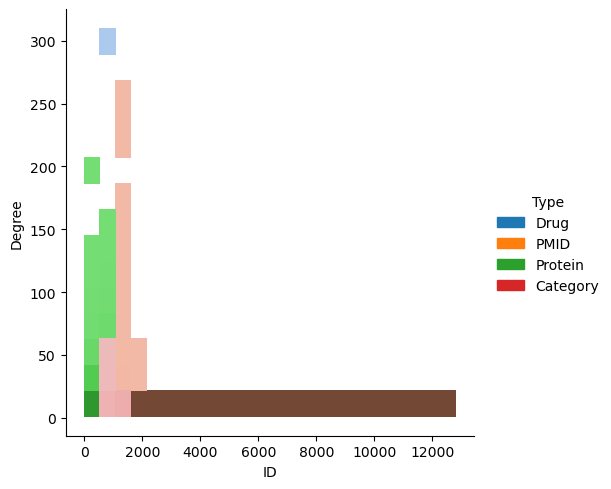

In [101]:
sns.displot(data, x="ID", y="Degree", hue="Type" )
plt.show()

## Ion Channel Network

@cypher:

    CALL gds.graph.create(
    'KG',
        ["MeSH", "Document", "Protein", "Drug"],
        {
            MENTIONS: {orientation: 'UNDIRECTED'},
            TARGET: {orientation: 'UNDIRECTED'},
            ASSIGNS: {orientation: 'UNDIRECTED'}
        }
    )

In [109]:
class degree():
    """Class to run LinkPred"""
    def __init__(self) -> None:
        self.driver = GraphDatabase.driver("neo4j://localhost:7687", auth=("neo4j", "heart"))

    def close(self) -> None:
        self.driver.close()

    @classmethod
    def algo(cls, tx) -> any:
        """
        @param cls is the class
        @param tx is the transaction
        @return result.data() is the data of algo
        """
        query = ("""
        CALL gds.degree.stream("KG")
        YIELD nodeId, score
        RETURN LABELS(gds.util.asNode(nodeId)) AS Type, nodeId as ID, score AS Degree
        ORDER BY Degree DESCENDING, ID DESC, Type DESC
        """)
        result = tx.run(query)
        return result.data()


    def run_algo(self) -> any:
        """
        @param self
        @return result is the dataframe from the degree centrality
        """
        result = self.driver.session().write_transaction(self.algo)
        result = pd.DataFrame(result)
        return result

In [110]:
hello = degree()
data = hello.run_algo()
for i in tqdm(range(len(data["Type"])), desc= "Iterating through Entities"):
    data["Type"][i] = data["Type"][i][0]
data

Iterating through Entities:   0%|          | 0/96253 [00:00<?, ?it/s]<ipython-input-110-36c282afa3c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][i] = data["Type"][i][0]
Iterating through Entities: 100%|██████████| 96253/96253 [01:21<00:00, 1182.35it/s]


,Type,ID,Degree
0,Protein,763,14519.0
1,Protein,787,11507.0
2,Protein,661,9430.0
3,Protein,717,6757.0
4,Protein,739,6360.0
...,...,...,...
96248,Protein,780,0.0
96249,Protein,714,0.0
96250,Protein,706,0.0
96251,Protein,691,0.0


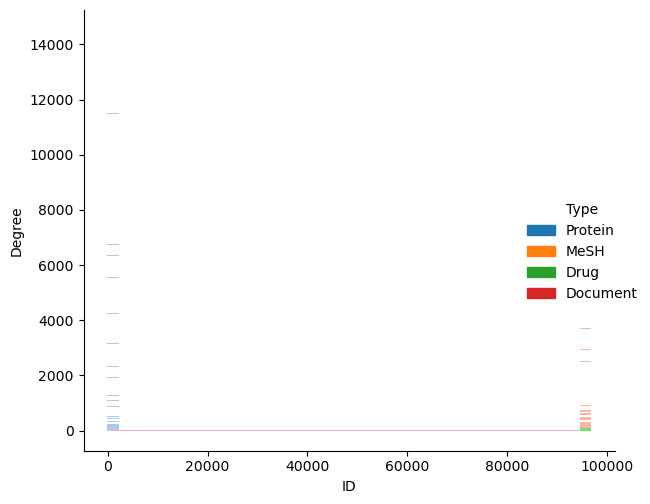

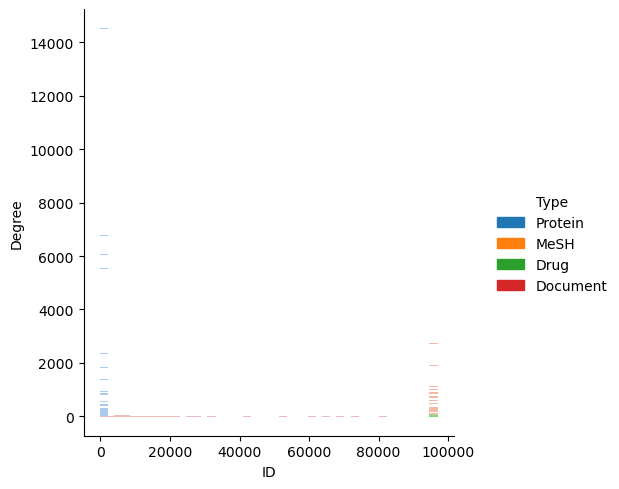

In [112]:
sns.displot(data, x="ID", y="Degree", hue="Type" )
plt.show()